<h1> Employee Churn Modeling </h1>

<h2> Agenda: </h2>

<h3>1. To dive deep into the employee data</h3>
<h3>2. Perform explotratory analysis </h3> 
<h3>3. Predict which employee is more likely to churn </h3>

<h2> Importing python libraries </h2>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

<h2> Importing data and exploring the attributes </h2>

In [129]:
df = pd.read_csv('company_employee.csv')

In [130]:
df.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Average Monthly Hours', 'Time Spent', 'Work Accident', 'Left or Not',
       'Promotion Last 5 years', 'Department', 'Salary '],
      dtype='object')

<h3> Removing spaces from column names to make referncing easier </h3>

In [131]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['SatisfactionLevel', 'LastEvaluation', 'NumberofProjects',
       'AverageMonthlyHours', 'TimeSpent', 'WorkAccident', 'LeftorNot',
       'PromotionLast5years', 'Department', 'Salary'],
      dtype='object')

<h3> 15000 rows and 10 columns </h3>

In [132]:
df.shape

(14999, 10)

<h3> Salary and separtment are string type and rest are numbers, no missing values </h3>

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
SatisfactionLevel      14999 non-null float64
LastEvaluation         14999 non-null float64
NumberofProjects       14999 non-null int64
AverageMonthlyHours    14999 non-null int64
TimeSpent              14999 non-null int64
WorkAccident           14999 non-null int64
LeftorNot              14999 non-null int64
PromotionLast5years    14999 non-null int64
Department             14999 non-null object
Salary                 14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [134]:
df.head()

,SatisfactionLevel,LastEvaluation,NumberofProjects,AverageMonthlyHours,TimeSpent,WorkAccident,LeftorNot,PromotionLast5years,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [135]:
df.tail()

,SatisfactionLevel,LastEvaluation,NumberofProjects,AverageMonthlyHours,TimeSpent,WorkAccident,LeftorNot,PromotionLast5years,Department,Salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


<h2> Jumping into some data insights </h2>

** What are the characteristics of employees who left as compared to those who did not leave? **

In [136]:
comp_char = df.groupby([df.LeftorNot]).mean()
comp_char

,SatisfactionLevel,LastEvaluation,NumberofProjects,AverageMonthlyHours,TimeSpent,WorkAccident,PromotionLast5years
LeftorNot,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


** The ablove ouput shows:<br>**
    ** *Satisfaction level of people who left is lower<br> **
    ** *Employees who left worked more <br> **
    ** *Employees who left had lower promotion rate <br> **
    ** *Employees who left had lower accidents at work **

<h3> How many employees left the company? </h3>

In [137]:
emp_left = df.groupby([df.LeftorNot]).count()
emp_left

,SatisfactionLevel,LastEvaluation,NumberofProjects,AverageMonthlyHours,TimeSpent,WorkAccident,PromotionLast5years,Department,Salary
LeftorNot,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


<h3> 3571 employees left the company which is 23% of the employees </h3>

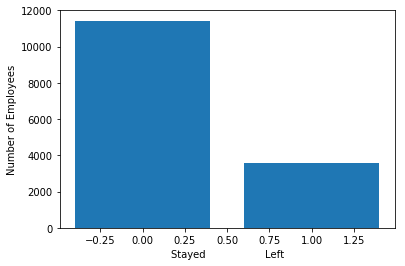

In [138]:
plt.bar(emp_left.index.values, emp_left.Salary)
plt.xlabel('Stayed                   Left')
plt.ylabel('Number of Employees')
plt.show()


<h3> Lets check the distribution of time spent in the company and the Number of projects </h3>

<h3> Moslt employees have around 3-4 projects </h3>

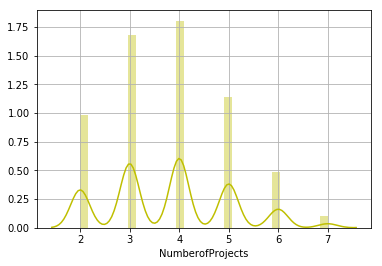

In [139]:
sns.distplot(df.NumberofProjects,color = 'y')
plt.grid()
plt.show()

<h3> Mostly employees spend around 3 years in the company and not many spend 6 or more </h3>

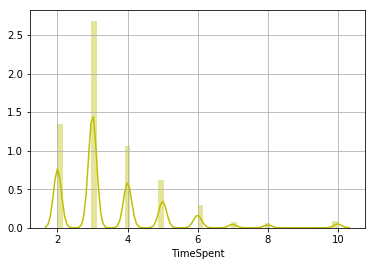

In [140]:
sns.distplot(df.TimeSpent,color = 'y')
plt.grid()
plt.show()

<h3> Lets create subplots </h3>

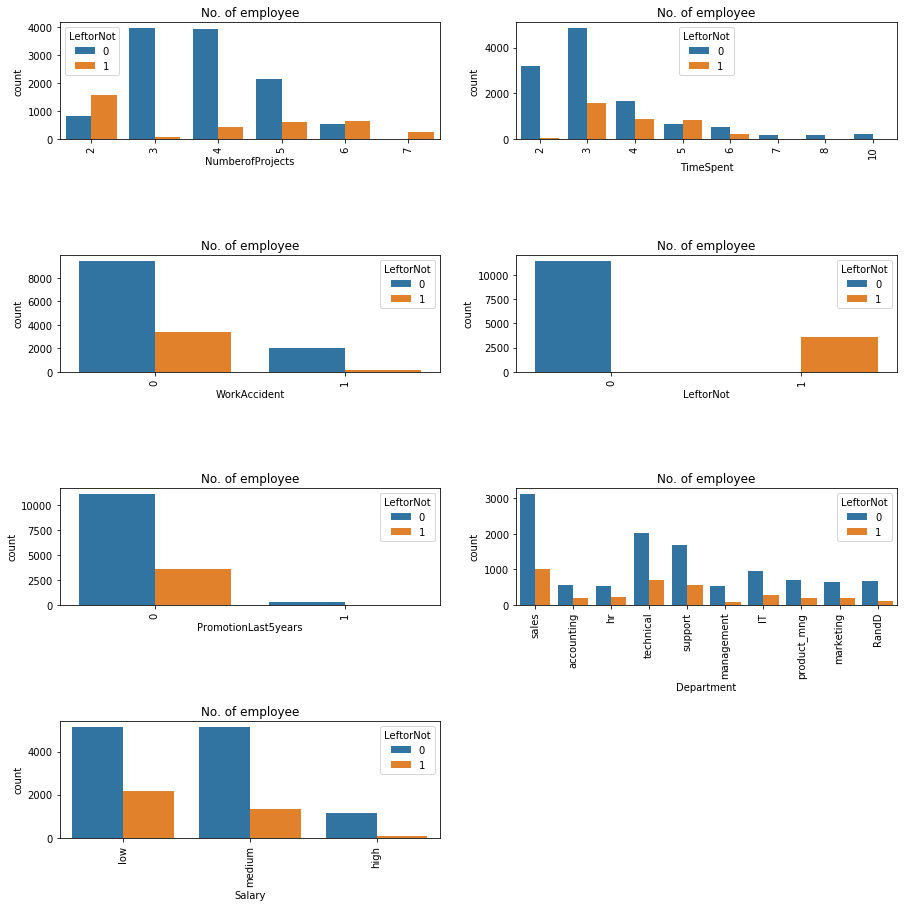

In [141]:
plt.clf()
features=['NumberofProjects',
        'TimeSpent', 'WorkAccident', 'LeftorNot',
       'PromotionLast5years', 'Department', 'Salary']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue = 'LeftorNot')
    plt.xticks(rotation=90)
    plt.title("No. of employee")
plt.show()

** Summary ** <br>
** 1. People with workload of 3-4 projects tend to stay more but as projects get higher than 5, work load is something that makes them leave. ** <br>
** 2. Most employees stay for 3-4 years, they appear to be more likely to leave the company if their tenure goes beyond 5 ** <br>
** 3. Promotions are a rare event in the company ** <br>
** 4. High salary employees are less likely to leave **

<h2> Performing cluster analysis on all employees using satisfaction level and last evaluation </h2>

In [142]:
from sklearn.cluster import KMeans

In [143]:
cluster_data = df.loc[(df.LeftorNot == 1),['SatisfactionLevel', 'LastEvaluation']]
cluster_data.shape

(3571, 2)

In [144]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

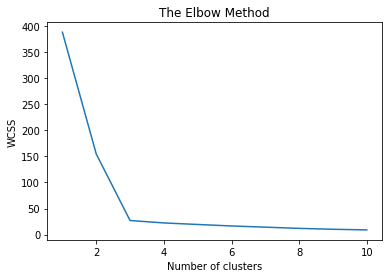

In [145]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h3> So the optimal number of clusters is 3 according to the elbow curve </h3>

In [146]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(cluster_data)

In [147]:
cluster_data['Label'] = kmeans.labels_

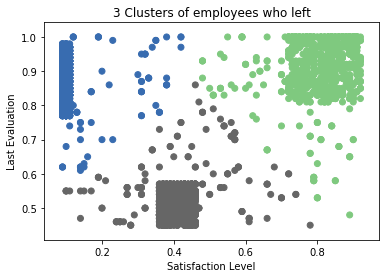

In [148]:
plt.scatter(left_emp['SatisfactionLevel'], left_emp['LastEvaluation'], c=cluster_data['Label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

** 1. Cluster 1: Low satisfaction, High evaluation - Not Comfortable **<br>
** 2. Cluster 2: Meduim satisfaction, low evaluation - Not fit**<br>
** 3. Cluster 3: High satisfaction, high evaluation - Happy and performing employees**

<h2> Data Preprocessing </h2>

In [150]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['Salary']=le.fit_transform(df['Salary'])

In [152]:
df = pd.get_dummies(df, drop_first = True)

In [153]:
df.head()

,SatisfactionLevel,LastEvaluation,NumberofProjects,AverageMonthlyHours,TimeSpent,WorkAccident,LeftorNot,PromotionLast5years,Salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [155]:
df.columns

Index(['SatisfactionLevel', 'LastEvaluation', 'NumberofProjects',
       'AverageMonthlyHours', 'TimeSpent', 'WorkAccident', 'LeftorNot',
       'PromotionLast5years', 'Salary', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [156]:
y = df.LeftorNot
X = df[['SatisfactionLevel', 'LastEvaluation', 'NumberofProjects',
       'AverageMonthlyHours', 'TimeSpent', 'WorkAccident',
       'PromotionLast5years', 'Salary', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical']]

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Prateikm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [161]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2> Predicting using gradient boosting module of sklearn </h2>

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

<h2> Testing the accuracy </h2>

In [170]:
print(f"Precision:{metrics.precision_score(y_test, y_pred)}")
print(f"Recall:{metrics.recall_score(y_test, y_pred)}",)

Precision:0.9655990510083037
Recall:0.9367088607594937


In [167]:
roc_auc_score(y_test, y_pred)

0.96332145571817118

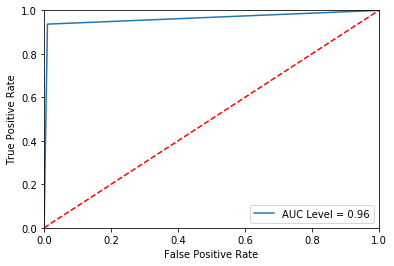

In [166]:

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,label='AUC Level = %0.2f' % (roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()